In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("../../train.csv")
X = df["Text"].values
y = df["Category"].values
m = 0.9 #proportion of data for training vs validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=m, random_state=42, shuffle=True)

### Task 2

SVM. Train two SVM classification models (soft-margin linear SVM and hard-margin RBF
kernel SVM) on the training dataset. You need to report two surface plots for: (i) the soft-margin
linear SVM with your choice of misclassification penalty (𝐶𝐶), and (ii) the hard-margin RBF kernel
with your choice of kernel width (σ). Explain the impact of penalty 𝐶𝐶 on the soft-margin decision
boundaries, as well as the kernel hyperparameter on the hard-margin decision boundaries

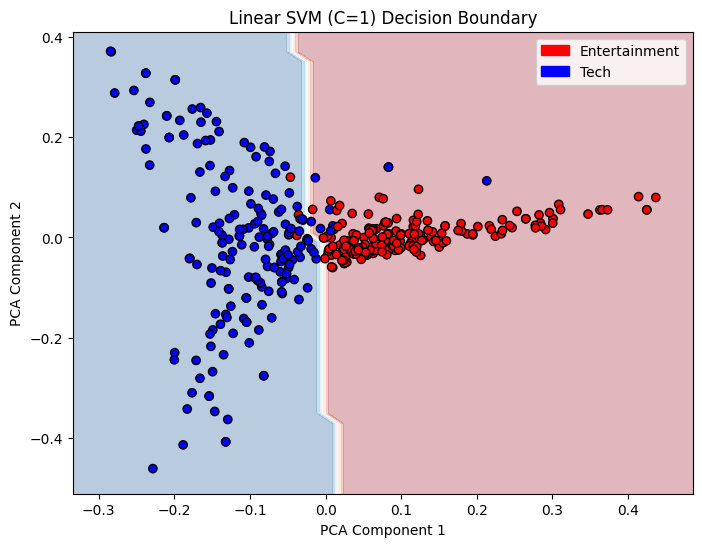

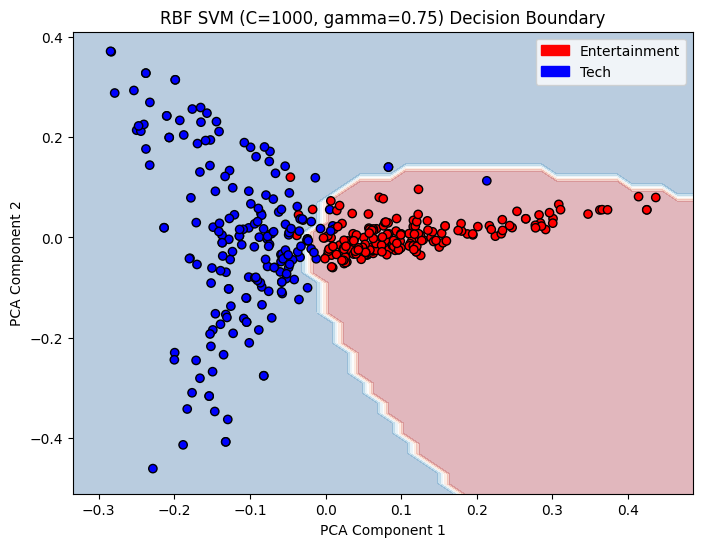

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Vectorise raw text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_vec.toarray())

# ------ LINEAR SVM (Soft Margin) ------
C_linear = 1
model_linear = svm.SVC(kernel='linear', C=C_linear)
model_linear.fit(X_train_2D, y_train)

# ------ RBF SVM (Hard Margin Style) ------
C_rbf = 1000
gamma_rbf = 0.75
model_rbf = svm.SVC(kernel='rbf', C=C_rbf, gamma=gamma_rbf)
model_rbf.fit(X_train_2D, y_train)

# ------ Plotting Function ------
def plot_decision_boundary(model, X, y, title):
    import matplotlib.patches as mpatches

    h = .02
    padding = 0.05
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_numeric = pd.factorize(Z)[0]
    Z_numeric = Z_numeric.reshape(xx.shape)

    # Convert class labels to numeric
    y_numeric, class_names = pd.factorize(y)

    plt.figure(figsize=(8, 6))

    # Light background
    background_cmap = plt.cm.RdBu_r
    plt.contourf(xx, yy, Z_numeric, cmap=background_cmap, alpha=0.3)

    # Full-strength colour for scatter points (manually mapped)
    colours = ['red' if label == 0 else 'blue' for label in y_numeric]
    plt.scatter(X[:, 0], X[:, 1], c=colours, edgecolors='k')

    # Legend with capitalised labels
    red_patch = mpatches.Patch(color='red', label=class_names[0].capitalize())
    blue_patch = mpatches.Patch(color='blue', label=class_names[1].capitalize())
    plt.legend(handles=[red_patch, blue_patch], loc='upper right')

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


# ------ Plot Both ------
plot_decision_boundary(model_linear, X_train_2D, y_train, f"Linear SVM (C={C_linear}) Decision Boundary")
plot_decision_boundary(model_rbf, X_train_2D, y_train, f"RBF SVM (C={C_rbf}, gamma={gamma_rbf}) Decision Boundary")


### Task 3

(a) We explore how the size of the training data set affects the test and train accuracy. For each
value of m in [0.1, 0.3, 0.5, 0.7, 0.9], train your classifier on the first m portion of the training
examples (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). Please report two
plots: (i) training and (ii) testing accuracy for each such value of m with the x-axis referring to m
and the y-axis referring to the classification accuracy in 𝐹1 measure as shown below. In total,
there should be four curves for training accuracy and four curves for testing accuracy. Explain
the general trend of the two plots in terms of training and testing accuracy if any.

In [11]:
#train classifier on different training sizes

(b) Let’s use 5-fold cross-validation to assess model performance. Investigate the impact of key
hyperparameters of your choices for each classifier using a testing dataset. E.g., for SVM, the
classification accuracy may be significantly affected by the kernels and hyperparameter
combination. List hyperparameters for each classifier and demonstrate how these
hyperparameters impact on the testing accuracy.

In [12]:
#use 5-fold CV to assess performance, experiment w diff hyperparams